# Introduction

(maybe a better introduction)

The basic idea behind the survey is to find out which is the graph gives the most acurracy in a certain amount of time.
In order to make to make questions, we followed the general structure provided by Dr.Bowen and person who worked on this project before us.

General Structure:
- Basic interpretability
    - We asked simple question to test if the responder understand the graph 
- Moving individuals
    - We provided a set of graphs which are suppose to be two teams (i.e Team A, Team B) and we asked responder to move a individuals from a team to other team depending on the question.
- Comparing team sets
    - Here we asked the responder to explore at two different scenarios (each scenario contained three different team) and provide a answer based on question. 
- General preference (rank viz choices)
    - In the end, we asked the responder to give their preference on which graph is the best from them and asked for an explaination.
    
We followed this general structure and based on this, Dr.Bowen and us came up with different question in order to test responder's understanding for each graph.

(Talk about acuuray vs time)

# Implementing Counterbalancing

As we were working to create the survey and we realized that the survey result might be unfair as we were asking graphs in a specifc order (i.e stack bar graph then group bar graph). As the graphs are different and has there own drawbacks. We throught of introducing counterbalancing to make our result fair. We used latin square technique for our study where we will **n** no. of version of our survey for the **n** no.of graphs. For example, if the survey has two type of graphs then there will be two versions. The first version will have graph type 1 then graph type 2 and the second version will have graph type 2 then graph type 1. 

(A better explanation for latin square)

### In the first section, we are analysing two graphs - Stack and Group bar graph.
### This graph are made for the Skills

### Stack bar graph
<img src ="../visualizations/VizSkills/p13v3s/q1a.png" width="500"/>

### Group bar graph
<img src ="../visualizations/VizSkills/p13v3g/q1a.png" width="500"/>

### For the counterbalancing, we created two version of section 1 Skills. 

### The Version 1 had Group bar graph first then Stacked bar graph
### The Version 2 had Stacked bar graph first then Group bar graph


In [1]:
import pandas as pd

df = pd.read_csv('../report/data/section 1/SkillsV1.csv')
df1 = pd.read_csv('../report/data/section 1/SkillsV2.csv')
print("-----------------------Section 1 Vesion 1--------------------------")
display(df)
print("-----------------------Section 1 Vesion 2--------------------------")
display(df1)

-----------------------Section 1 Vesion 1--------------------------


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q187_Last Click,Q187_Page Submit,Q187_Click Count,Q32,Q188_First Click,Q188_Last Click,Q188_Page Submit,Q188_Click Count,Q33,Q34
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Timing - Last Click,Timing - Page Submit,Timing - Click Count,Your goal is to form teams so that members who...,Timing - First Click,Timing - Last Click,Timing - Page Submit,Timing - Click Count,You saw two types of graphs in the previous qu...,Please explain your choice so we can understan...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID211_LAST_CLICK""}","{""ImportId"":""QID211_PAGE_SUBMIT""}","{""ImportId"":""QID211_CLICK_COUNT""}","{""ImportId"":""QID196""}","{""ImportId"":""QID212_FIRST_CLICK""}","{""ImportId"":""QID212_LAST_CLICK""}","{""ImportId"":""QID212_PAGE_SUBMIT""}","{""ImportId"":""QID212_CLICK_COUNT""}","{""ImportId"":""QID49""}","{""ImportId"":""QID50_TEXT""}"
2,2021-12-06 20:54:52,2021-12-06 21:49:44,IP Address,142.231.42.45,100,3292,True,2021-12-06 21:49:45,R_2zO3BlZTzWxd5XF,NaN,...,90.056,91.395,1,Scenario 2 is better for my class,531.167,531.167,533.846,1,Grouped Bar Graph is easier to understand,NaN
3,2021-12-06 23:02:22,2021-12-06 23:22:08,IP Address,24.71.96.164,100,1185,True,2021-12-06 23:22:08,R_1hzBCYJYZ1dxOmX,NaN,...,16.571,18.015,1,Scenario 2 is better for my class,84.463,84.463,85.695,1,Grouped Bar Graph is easier to understand,I think the grouped bar graph is more easy to ...
4,2021-12-07 13:55:50,2021-12-07 14:18:55,IP Address,70.36.59.148,100,1385,True,2021-12-07 14:18:56,R_2xV4DjyC8VUfgEc,NaN,...,10.196,12.675,1,I can't tell from graphs,43.489,44.592,49.824,2,Stacked Bar Graph is easier to understand,Stacked was usually easier to interpret quickl...


-----------------------Section 1 Vesion 2--------------------------


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q204_Last Click,Q204_Page Submit,Q204_Click Count,Q32,Q205_First Click,Q205_Last Click,Q205_Page Submit,Q205_Click Count,Q33,Q34
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Timing - Last Click,Timing - Page Submit,Timing - Click Count,Your goal is to form teams so that strong stud...,Timing - First Click,Timing - Last Click,Timing - Page Submit,Timing - Click Count,You saw two types of graphs in the previous qu...,Please explain your choice so we can understan...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID228_LAST_CLICK""}","{""ImportId"":""QID228_PAGE_SUBMIT""}","{""ImportId"":""QID228_CLICK_COUNT""}","{""ImportId"":""QID186""}","{""ImportId"":""QID229_FIRST_CLICK""}","{""ImportId"":""QID229_LAST_CLICK""}","{""ImportId"":""QID229_PAGE_SUBMIT""}","{""ImportId"":""QID229_CLICK_COUNT""}","{""ImportId"":""QID49""}","{""ImportId"":""QID50_TEXT""}"
2,2021-12-06 22:37:42,2021-12-06 22:48:37,IP Address,24.71.116.181,100,654,True,2021-12-06 22:48:37,R_9TZmFl6GDLX9Dax,NaN,...,3.203,4.268,1,Scenario 1 is better for my class,2.481,2.481,5.098,1,Grouped Bar Graph is easier to understand,it makes it easier to compare and understand w...
3,2021-12-06 23:17:56,2021-12-06 23:37:28,IP Address,174.7.180.147,100,1171,True,2021-12-06 23:37:28,R_33rji3iLO8KbPPS,NaN,...,76.47,81.208,3,Scenario 1 is better for my class,9.726,11.2,12.227,2,Grouped Bar Graph is easier to understand,NaN


In [2]:
# Drops the unnecessary rows
df = df.drop(labels=[0,1,2], axis=0)
df1 = df1.drop(labels=[0,1], axis=0)
print("-----------------------Section 1 Vesion 1--------------------------")
display(df)
print("-----------------------Section 1 Vesion 2--------------------------")
display(df1)

-----------------------Section 1 Vesion 1--------------------------


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q187_Last Click,Q187_Page Submit,Q187_Click Count,Q32,Q188_First Click,Q188_Last Click,Q188_Page Submit,Q188_Click Count,Q33,Q34
3,2021-12-06 23:02:22,2021-12-06 23:22:08,IP Address,24.71.96.164,100,1185,True,2021-12-06 23:22:08,R_1hzBCYJYZ1dxOmX,NaN,...,16.571,18.015,1,Scenario 2 is better for my class,84.463,84.463,85.695,1,Grouped Bar Graph is easier to understand,I think the grouped bar graph is more easy to ...
4,2021-12-07 13:55:50,2021-12-07 14:18:55,IP Address,70.36.59.148,100,1385,True,2021-12-07 14:18:56,R_2xV4DjyC8VUfgEc,NaN,...,10.196,12.675,1,I can't tell from graphs,43.489,44.592,49.824,2,Stacked Bar Graph is easier to understand,Stacked was usually easier to interpret quickl...


-----------------------Section 1 Vesion 2--------------------------


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q204_Last Click,Q204_Page Submit,Q204_Click Count,Q32,Q205_First Click,Q205_Last Click,Q205_Page Submit,Q205_Click Count,Q33,Q34
2,2021-12-06 22:37:42,2021-12-06 22:48:37,IP Address,24.71.116.181,100,654,True,2021-12-06 22:48:37,R_9TZmFl6GDLX9Dax,NaN,...,3.203,4.268,1,Scenario 1 is better for my class,2.481,2.481,5.098,1,Grouped Bar Graph is easier to understand,it makes it easier to compare and understand w...
3,2021-12-06 23:17:56,2021-12-06 23:37:28,IP Address,174.7.180.147,100,1171,True,2021-12-06 23:37:28,R_33rji3iLO8KbPPS,NaN,...,76.47,81.208,3,Scenario 1 is better for my class,9.726,11.2,12.227,2,Grouped Bar Graph is easier to understand,NaN


## For EDA, We will compare time taken for each version

In [3]:
timeV1 = df[['Duration (in seconds)']].astype(int)
timeV1['Version'] = ['1', '1']
timeV1 = timeV1.reset_index()
display(timeV1)
timeV2 = df1[['Duration (in seconds)']].astype(int)
timeV2['Version'] = ['2','2']
timeV2 = timeV2.reset_index()
display(timeV2)
merged_df = pd.concat([timeV1, timeV2], axis=0).reset_index().drop(labels=['level_0','index'], axis=1)
display(merged_df)

,index,Duration (in seconds),Version
0,3,1185,1
1,4,1385,1


,index,Duration (in seconds),Version
0,2,654,2
1,3,1171,2


,Duration (in seconds),Version
0,1185,1
1,1385,1
2,654,2
3,1171,2


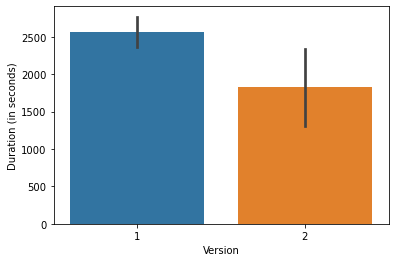

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(x="Version", y="Duration (in seconds)", data = merged_df, estimator = np.sum)

### We took a total of time taken by responders for each Version and as a result, more time was taken in the Version 1. At the same time, this is small database. So, it is diffcult to come up with a conclusion.

In [5]:
# we will considered the page submit as the time taken to complete one question.
#Get the label of columns which starts with "Q"

# Put this is a separate python file 
# This will work on both section

# V2
colRemove = ["First", "Last", "Click"]
question = [col for col in df1 if col.startswith('Q')]
# not clean, come up with different way
question = [col for col in question if "First" not in col]
question = [col for col in question if "Last" not in col]
question = [col for col in question if "Click" not in col]
question = [col for col in question if "Page" not in col]
question = df1[question]
# Dropping Q33 and Q34 as they are preference question
question = question.drop(labels=["Q33", "Q34"], axis=1)
question.to_string()

# To get the index of the a column
#index_no = question.columns.get_loc("Q2")
#print(index_no)
temp = question.loc[0:2]
temp

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32
2,Members in Team A are more proficient,Members in Team A are more proficient,Members in Team B are more proficient,Members in Team B are more proficient,Members in Team E are more proficient,Members in Team E are more proficient,Members in Team E are more proficient,Members in Team E are more proficient,Move Cole to team B,Move no one,...,Members in Team G are more proficient,Members in Team G are more proficient,Move Cole to team B,Move Cole to team B,Move no one,Move no one,Scenario 1 is better for my class,Scenario 1 is better for my class,Scenario 2 is better for my class,Scenario 1 is better for my class


In [27]:
# CSV containing correct answer
correct = pd.read_csv("../report/answer/S1V2.csv", delimiter= ";")
display(correct)
for i in range(1,33):
    #print(temp[f"Q{i}"].str.strip())
    #print(correct[f"Q{i}"].str.strip())
    if temp[f"Q{i}"].str.strip().equals(correct[f"Q{i}"].str.strip()):
        print("Yes")
    else:
        print("No")


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32
0,Members in Team B are more proficient,Members in Team A are more proficient,Members in Team B are more proficient,Members in Team B are more proficient,Members in Team F are more proficient,Members in Team E are more proficient,Members in Team F are more proficient,Members in Team E are more proficient,Move no one,Move Blake to Team B,...,Members in Team G are more proficient,Members in Team G are more proficient,Move Blake to Team B,Move Cole to Team B,Move no one,Move Sid to Team B,Scenario 1 is better for my class,Scenario 2 is better for my class,Scenario 2 is better for my class,Scenario 1 is better for my class


No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No


In [10]:
# Calculate the average time taken per question
# calculate the accuray by mathcing the right answer
# calculate average ratio between accuray and time

## General Feedback and Suggested Improvement


### Section 1 V1 & V2

- Move a student Q26 for V1 and Q10 for V2 is the same graph
- Too many graphs!
- We can add Q1_Timer for Timer in Qualtrics. Make it easier to analyze the data